<a href="https://colab.research.google.com/github/Pandey23000Om/Image-Classification/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn import datasets

mnist = datasets.fetch_openml('mnist_784')

In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
%matplotlib inline

In [6]:
import matplotlib.pyplot as plt

In [7]:
some_digit = x[36000]
some_digit_image = some_digit.reshape(28,28)

(-0.5, 27.5, 27.5, -0.5)

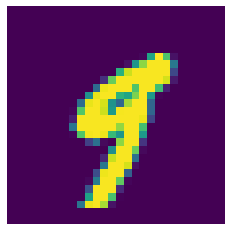

In [8]:
plt.imshow(some_digit_image, interpolation='nearest')
plt.axis("off")

In [9]:
y[36000]

'9'

In [10]:
x_train,x_test = x[:60000],x[60000:]
y_train,y_test = y[:60000],y[60000:]

In [11]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train,y_train = x_train[shuffle_index], y_train[shuffle_index]

In [12]:
y_train[36000]

'5'

In [13]:
import xgboost as xgb
clf = xgb.XGBClassifier(tol = 0.1)

In [14]:
clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tol=0.1, verbosity=1)

In [15]:
clf.predict(x_train)

array(['8', '3', '1', ..., '4', '7', '5'], dtype=object)

In [16]:
from sklearn.model_selection import cross_val_score as cvs

In [17]:
cvs(clf, x_train, y_train, cv=3, scoring='accuracy')

array([0.93275, 0.932  , 0.93205])

In [18]:
cvs(clf, x_test, y_test, cv=3, scoring='accuracy')

array([0.89622076, 0.91329133, 0.93189319])

In [19]:
y_pred = clf.predict(x_test)



from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error

print("RMSE: ", sqrt(mean_squared_error(y_test, y_pred)))
print("R2_Score for test: ", r2_score(y_test, y_pred))

RMSE:  1.054229576515476
R2_Score for test:  0.8674568916837445


In [20]:
clf.predict(x_test[9999:])

array(['6'], dtype=object)

In [21]:
y_test[-1]

'6'